In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
df = pd.read_csv("/content/crop.csv")

In [35]:
df.count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [14]:
print(df.size)
print(df.shape)
print(df.columns)

17600
(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [37]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [17]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [18]:
features = df.drop(['label'], axis="columns")
target = df.label
label = df.label
acc = []
models = []
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(
    criterion='entropy', random_state=2, max_depth=5)

DecisionTree.fit(Xtrain, Ytrain)
predicated_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicated_values)

acc.append(x)
models.append('Decision Tree')

print(f'Decision Tree\'s Accuracy is: {x*100: .2f}%')
print(classification_report(Ytest, predicated_values))

Decision Tree's Accuracy is:  90.00%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pickle
import os
directory = 'ml_models'
if not os.path.exists(directory):
    os.makedirs(directory)
DecisionTree = DecisionTreeClassifier()
scores = cross_val_score(DecisionTree, features, target, cv=5)
print("Cross-validation scores:", scores)
DT_pkl_filename = 'DecisionTree.pkl'
with open(f'{directory}/{DT_pkl_filename}', 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

Cross-validation scores: [0.99090909 0.98409091 0.98636364 0.99090909 0.98636364]


In [26]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
models.append('Naive Bayes')
print(f"Naive Bayes's Accuracy is: {x*100: .2f}%")

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.09%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [27]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [28]:
import pickle

NB_pkl_filename = 'NBClassifier.pkl'

with open(f'ml_models/{NB_pkl_filename}', 'wb') as NB_Model_pkl:
    pickle.dump(NaiveBayes, NB_Model_pkl)

In [29]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
models.append('SVM')
print(f"SVM's Accuracy is: {x*100: .2f}")

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  10.68
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.07        29
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [31]:
import pickle

SVM_pkl_filename = 'SVMClassifier.pkl'

with open(f'ml_models/{SVM_pkl_filename}', 'wb') as SVM_Model_pkl:
    pickle.dump(SVM, SVM_Model_pkl)

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain.values)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
models.append('Random Forest')
print(f"RF's Accuracy is: {x*100: .2f}")

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.09
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

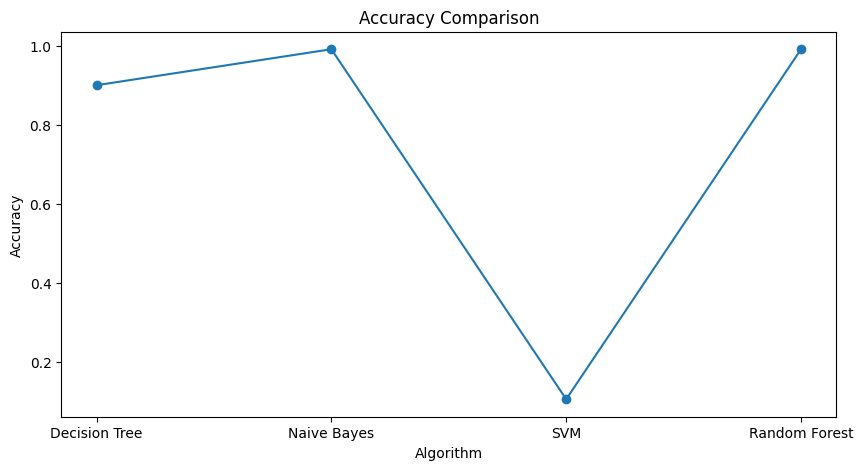

In [33]:
import pickle

RF_pkl_filename = 'RFClassifier.pkl'

with open(f'ml_models/{RF_pkl_filename}', 'wb') as RF_Model_pkl:
    pickle.dump(RF, RF_Model_pkl)
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.plot(models, acc)
plt.scatter(models, acc)

In [34]:
data = np.array([[40,20, 20, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coconut']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
